## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [1]:
import cv2
import glob
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import mean_squared_error

import pickle
import sys

import os
import pandas as pd
import matplotlib.gridspec as gridspec

import seaborn as sns

from PIL import Image
from skimage.transform import rescale, resize, rotate
from skimage.color import gray2rgb, rgb2gray
from skimage import transform, filters, exposure
from skimage.io import imread

from scipy.ndimage.interpolation import rotate

import platform

%matplotlib inline


In [118]:
class ChessBoardClass(object):

    def __init__(self):
        
        x_cor = 9 #Number of corners to find
        y_cor = 6
        # Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
        self.objp = np.zeros((y_cor*x_cor,3), np.float32)
        self.objp[:,:2] = np.mgrid[0:x_cor, 0:y_cor].T.reshape(-1,2)
        
        self.objpoints = [] # 3d points in real world space
        self.imgpoints = [] # 2d points in image plane.

        self.missing_chess_board = {}
    
    def setImages(self,filenames):
        self.orig_images = list( map( lambda f:cv2.imread(f), filenames ) )
        self.gray_images = list( map( lambda img:cv2.cvtColor(img,cv2.COLOR_RGB2GRAY),self.orig_images ) )

    def checkChessBoard(self, filenames):
        
        self.setImages(filenames)
        plt.figure(figsize=(22,26))
        plt.figtext(0.5,0.9,'ChessBoard Corners Patterns Detection', fontsize=22, ha='center')

        for i, gray_image in enumerate(self.gray_images):

            ret, corners = cv2.findChessboardCorners(gray_image, (9,6),None)
            # If found, add object points, image points
            if ret == True:
                self.objpoints.append(objp)
                self.imgpoints.append(corners)
                plt.subplot(7,3,len( self.imgpoints )  )
                plt.title(filenames[i])

                # Draw and display the corners
                image = cv2.drawChessboardCorners(self.orig_images[i], (9,6), corners, ret)
                plt.axis('off')
                plt.imshow(image)
            else:
                self.missing_chess_board[filenames[i]] = self.orig_images[i]
    

        print("-" * 50)
        print("   Successful to draw chessboard. %d images" % len(self.imgpoints) )
        print("-" * 50)
    
    def drawMissingCornerChessBoard(self):

        print("-" * 50)
        print("   Missing chessboard. %d images" % len(self.missing_chess_board.keys()) )
        print("-" * 50)
        
        plt.figure(figsize=(22,10))
        plt.figtext(0.5,0.9,'Missing ChessBoard Corners', fontsize=22, ha='center')
        
        for i, (k,v) in enumerate( self.missing_chess_board.items() ):
            plt.subplot(1,3, i+1  )
            plt.title(k)

            # Draw and display the corners
            plt.axis('off')
            plt.imshow(v)
                
            


In [119]:
# read chess board images 
imagefiles = glob.glob('./camera_cal/calibration*.jpg')
print(imagefiles)

['./camera_cal/calibration5.jpg', './camera_cal/calibration4.jpg', './camera_cal/calibration6.jpg', './camera_cal/calibration7.jpg', './camera_cal/calibration3.jpg', './camera_cal/calibration2.jpg', './camera_cal/calibration1.jpg', './camera_cal/calibration20.jpg', './camera_cal/calibration19.jpg', './camera_cal/calibration18.jpg', './camera_cal/calibration15.jpg', './camera_cal/calibration14.jpg', './camera_cal/calibration16.jpg', './camera_cal/calibration17.jpg', './camera_cal/calibration13.jpg', './camera_cal/calibration12.jpg', './camera_cal/calibration10.jpg', './camera_cal/calibration11.jpg', './camera_cal/calibration9.jpg', './camera_cal/calibration8.jpg']


In [120]:
# review chess board with drawChessboardCorners
chessBoard = ChessBoardClass()


## Find Chess Board Corner ##

--------------------------------------------------
   Successful to draw chessboard. 17 images
--------------------------------------------------


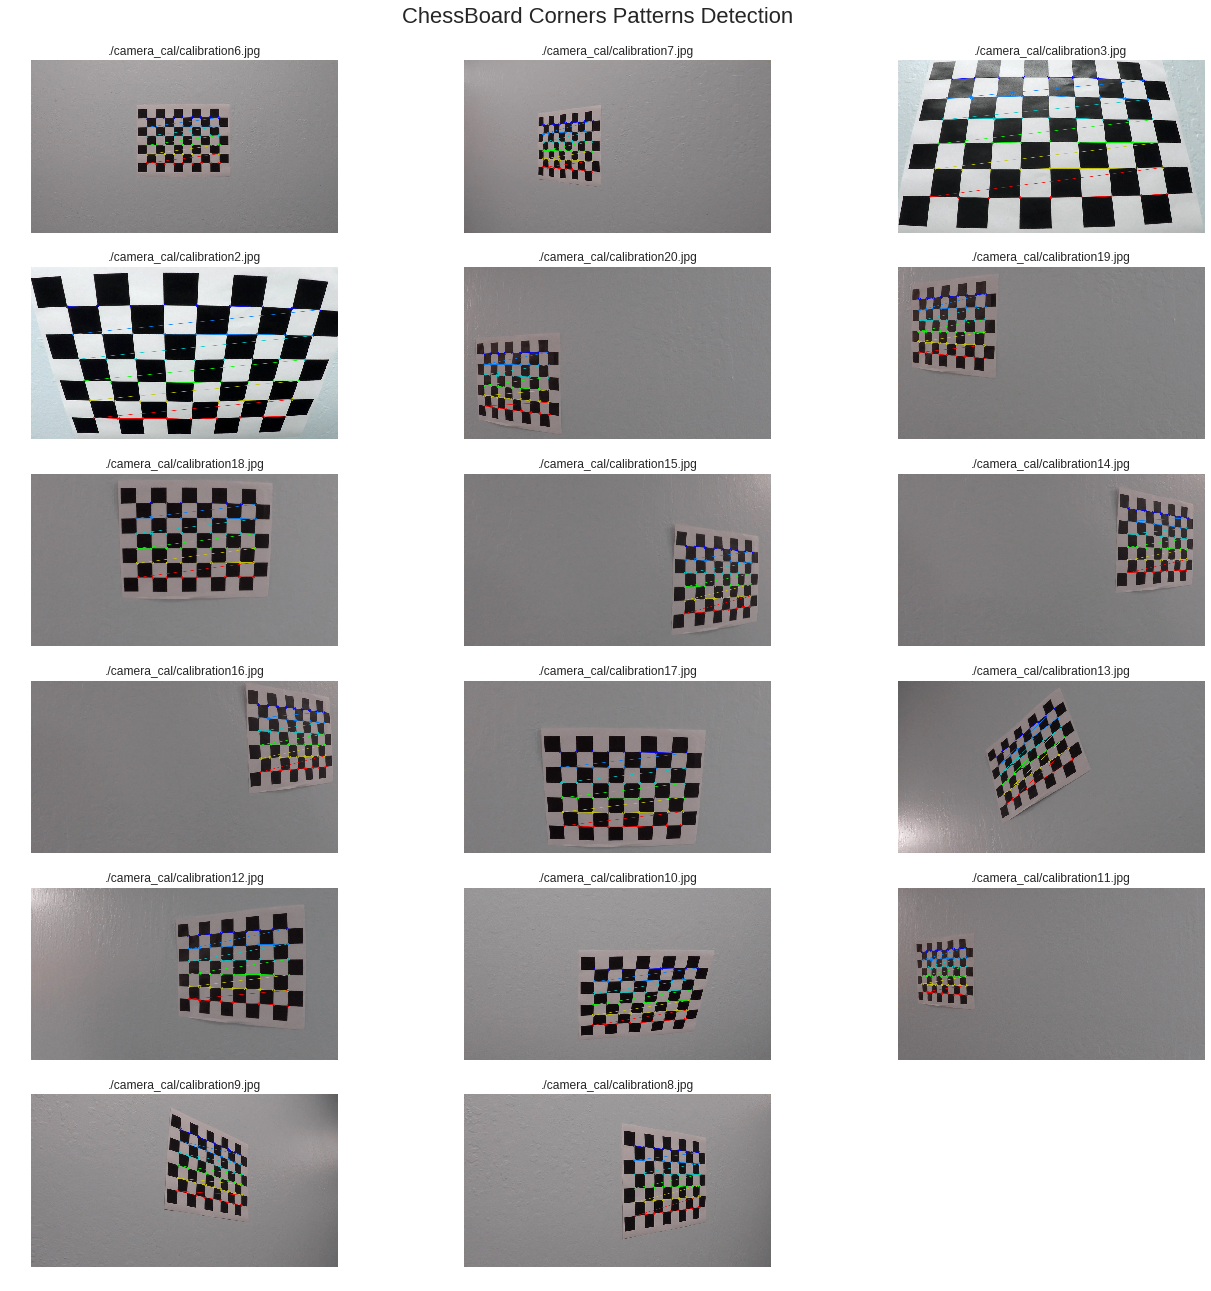

In [121]:
chessBoard.checkChessBoard(imagefiles)

## Missing ChessBoard Corner ##

--------------------------------------------------
   Missing chessboard. 3 images
--------------------------------------------------


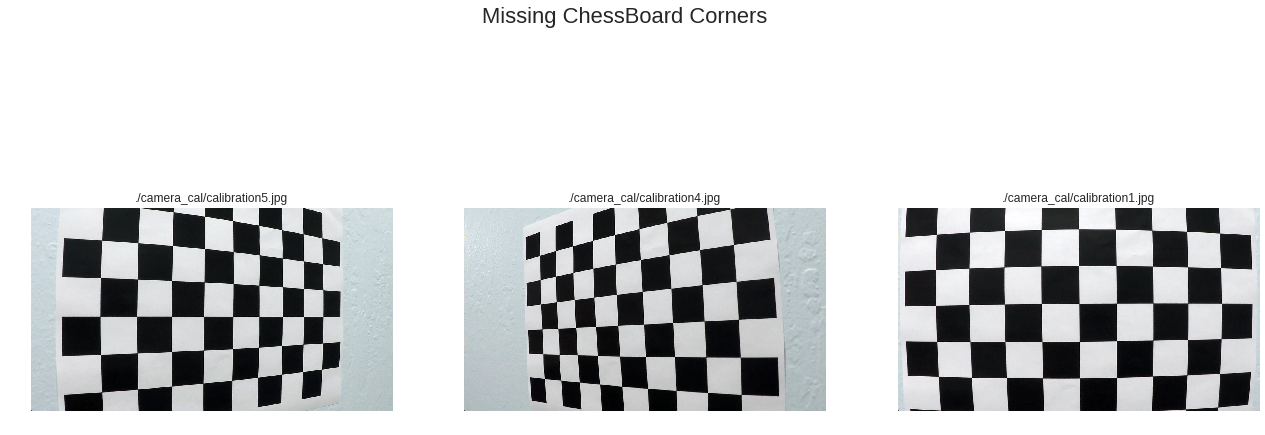

In [122]:
chessBoard.drawMissingCornerChessBoard()